In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

cnames = { 'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887',
'cadetblue': '#5F9EA0','chartreuse': '#7FFF00','chocolate': '#D2691E','coral': '#FF7F50','cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC','crimson': '#DC143C','cyan': '#00FFFF','darkblue': '#00008B','darkcyan': '#008B8B','darkgoldenrod': '#B8860B','darkgray': '#A9A9A9',
'darkgreen': '#006400','darkkhaki': '#BDB76B','darkmagenta': '#8B008B','darkolivegreen': '#556B2F','darkorange': '#FF8C00',
'darkorchid': '#9932CC','darkred': '#8B0000','darksalmon': '#E9967A','darkseagreen': '#8FBC8F','darkslateblue': '#483D8B','darkslategray': '#2F4F4F','darkturquoise': '#00CED1','darkviolet': '#9400D3',
'deeppink': '#FF1493','deepskyblue': '#00BFFF','dimgray': '#696969','dodgerblue': '#1E90FF','firebrick': '#B22222','floralwhite': '#FFFAF0','forestgreen': '#228B22','fuchsia': '#FF00FF',
'gainsboro': '#DCDCDC','ghostwhite': '#F8F8FF','gold': '#FFD700','goldenrod': '#DAA520','gray': '#808080','green': '#008000','greenyellow': '#ADFF2F','honeydew': '#F0FFF0','hotpink': '#FF69B4',
'indianred': '#CD5C5C','indigo': '#4B0082','ivory': '#FFFFF0','khaki': '#F0E68C','lavender': '#E6E6FA','lavenderblush': '#FFF0F5','lawngreen': '#7CFC00','lemonchiffon': '#FFFACD','lightblue': '#ADD8E6','lightcoral': '#F08080',
'lightcyan': '#E0FFFF','lightgoldenrodyellow': '#FAFAD2','lightgreen': '#90EE90','lightgray': '#D3D3D3','lightpink': '#FFB6C1','lightsalmon': '#FFA07A','lightseagreen': '#20B2AA',
'lightskyblue': '#87CEFA','lightslategray': '#778899','lightsteelblue': '#B0C4DE','lightyellow': '#FFFFE0','lime': '#00FF00','limegreen': '#32CD32','linen': '#FAF0E6',
'magenta': '#FF00FF','maroon': '#800000','mediumaquamarine': '#66CDAA','mediumblue': '#0000CD','mediumorchid': '#BA55D3','mediumpurple': '#9370DB','mediumseagreen': '#3CB371',
'mediumslateblue': '#7B68EE','mediumspringgreen': '#00FA9A','mediumturquoise': '#48D1CC','mediumvioletred': '#C71585','midnightblue': '#191970','mintcream': '#F5FFFA','mistyrose': '#FFE4E1',
'moccasin': '#FFE4B5','navajowhite': '#FFDEAD','navy': '#000080','oldlace': '#FDF5E6','olive': '#808000','olivedrab': '#6B8E23','orange': '#FFA500','orangered': '#FF4500',
'orchid': '#DA70D6','palegoldenrod': '#EEE8AA','palegreen': '#98FB98','paleturquoise': '#AFEEEE','palevioletred': '#DB7093','papayawhip': '#FFEFD5','peachpuff': '#FFDAB9',
'peru': '#CD853F','pink': '#FFC0CB','plum': '#DDA0DD','powderblue': '#B0E0E6','purple': '#800080','red': '#FF0000','rosybrown': '#BC8F8F','royalblue': '#4169E1','saddlebrown': '#8B4513',
'salmon': '#FA8072','sandybrown': '#FAA460','seagreen': '#2E8B57','seashell': '#FFF5EE','sienna': '#A0522D','silver': '#C0C0C0','skyblue': '#87CEEB','slateblue': '#6A5ACD','slategray': '#708090','snow': '#FFFAFA','springgreen': '#00FF7F','steelblue': '#4682B4','tan': '#D2B48C',
'teal': '#008080','thistle': '#D8BFD8','tomato': '#FF6347','turquoise': '#40E0D0','violet': '#EE82EE','wheat': '#F5DEB3','white': '#FFFFFF','whitesmoke': '#F5F5F5','yellow': '#FFFF00','yellowgreen': '#9ACD32'}

colors = list(cnames.keys())

In [85]:
data=  pd.read_csv("input/students_adaptability_level_online_education.csv")
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [86]:
data.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [87]:
data.replace("Boy","Male",inplace=True)
data.replace("Girl","Female",inplace=True)

In [88]:
data.replace("Mid","Middle",inplace=True)
data.replace("Poor","Lower",inplace=True)
data.replace("Rich","Upper",inplace=True)

In [89]:
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle,Wifi,4G,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle,Wifi,4G,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Female,16-20,College,Non Government,No,Yes,Low,Middle,Wifi,4G,1-3,No,Mobile,Low
1201,Female,16-20,College,Non Government,No,No,High,Middle,Wifi,4G,3-6,No,Mobile,Moderate
1202,Male,11-15,School,Non Government,No,Yes,Low,Middle,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Female,16-20,College,Non Government,No,No,Low,Middle,Wifi,4G,1-3,No,Mobile,Low


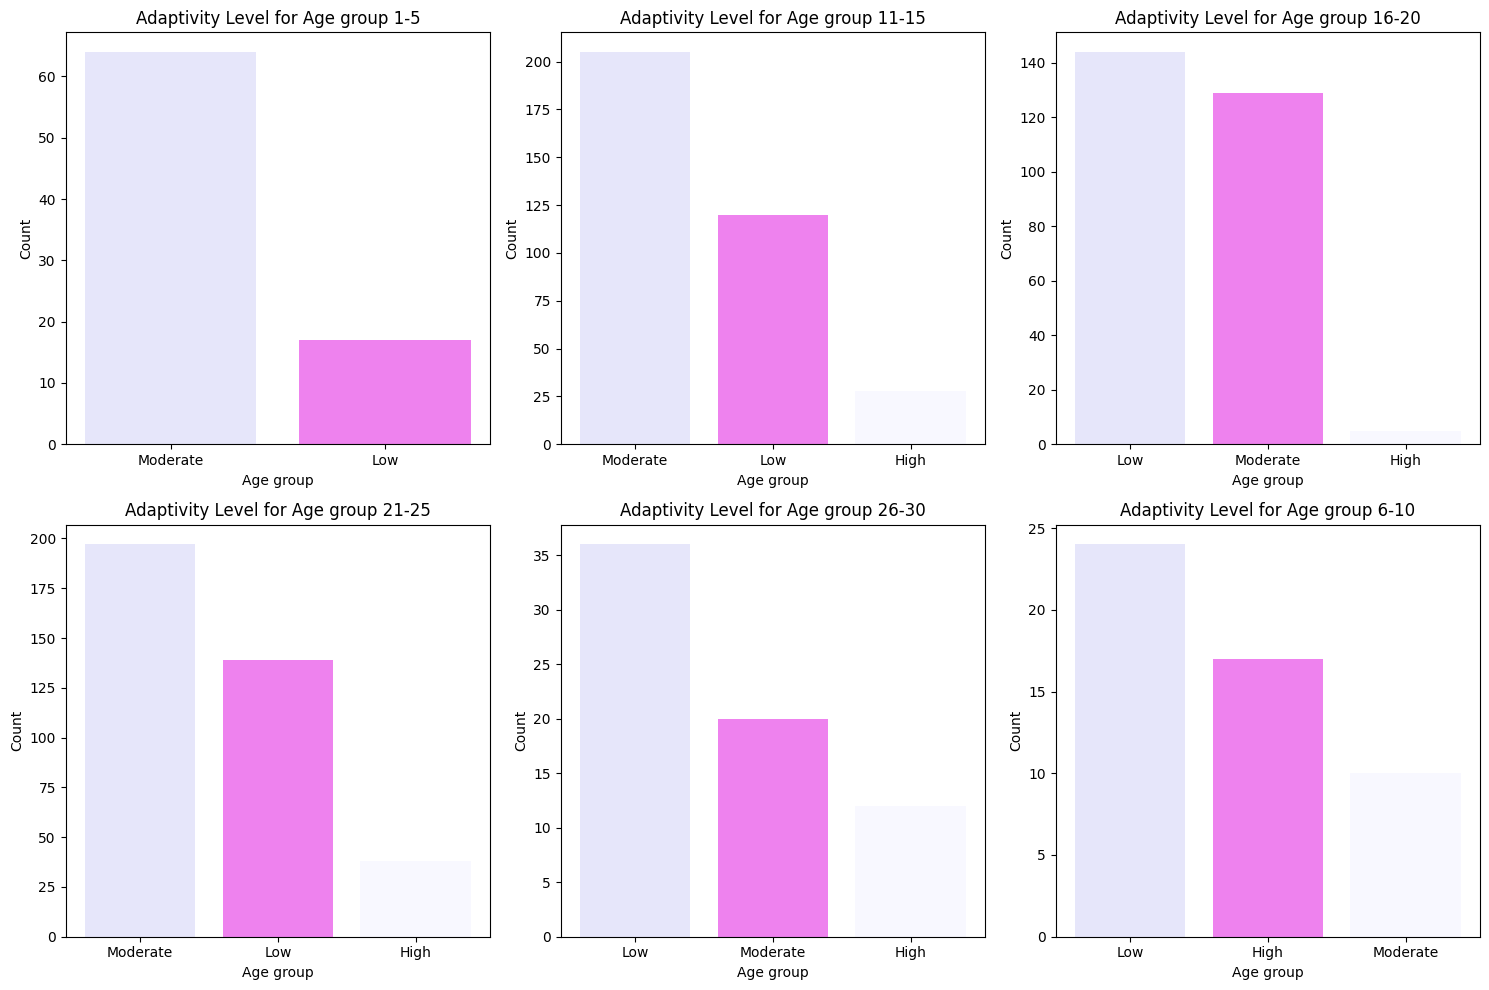

In [90]:
# How Age Group impacts Online Education?
random.shuffle(colors)
plt.figure(figsize=(15,10))
graphs = 1
for i in np.unique(data.Age.values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data.Age == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Adaptivity Level for Age group " + i)
    plt.xlabel("Age group")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

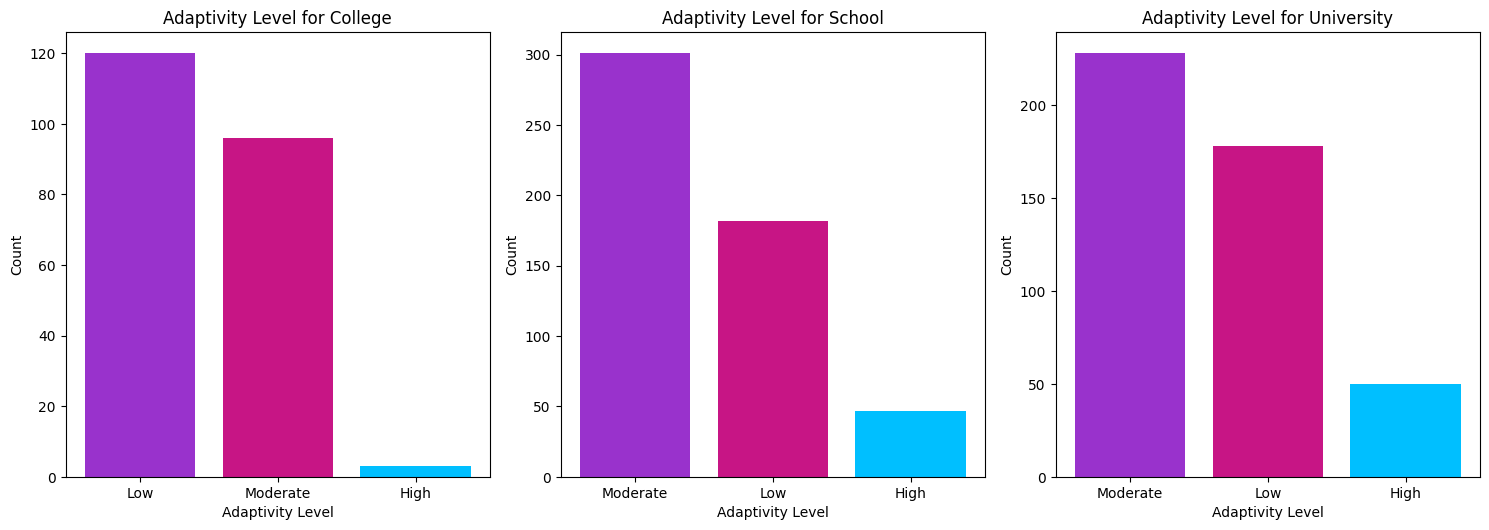

In [91]:
# How Education Level impacts Online Education?
random.shuffle(colors)
plt.figure(figsize=(15,10))
graphs = 1
for i in np.unique(data["Education Level"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Education Level"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Adaptivity Level for " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

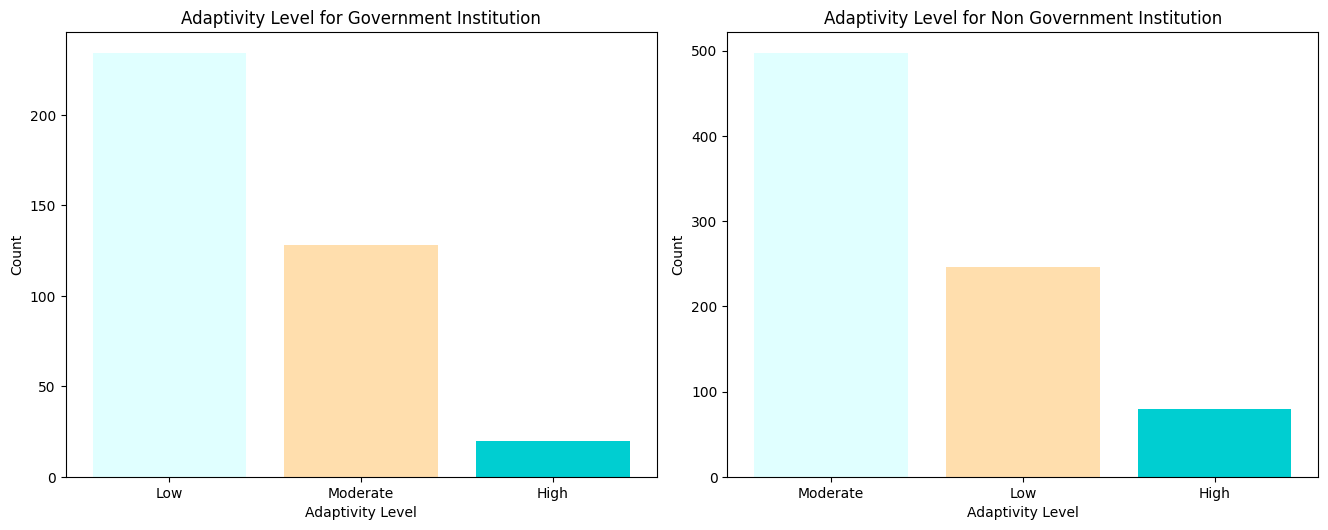

In [92]:
# How Institution Type impacts Online Education?
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Institution Type"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Institution Type"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Adaptivity Level for " + i + " Institution")
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

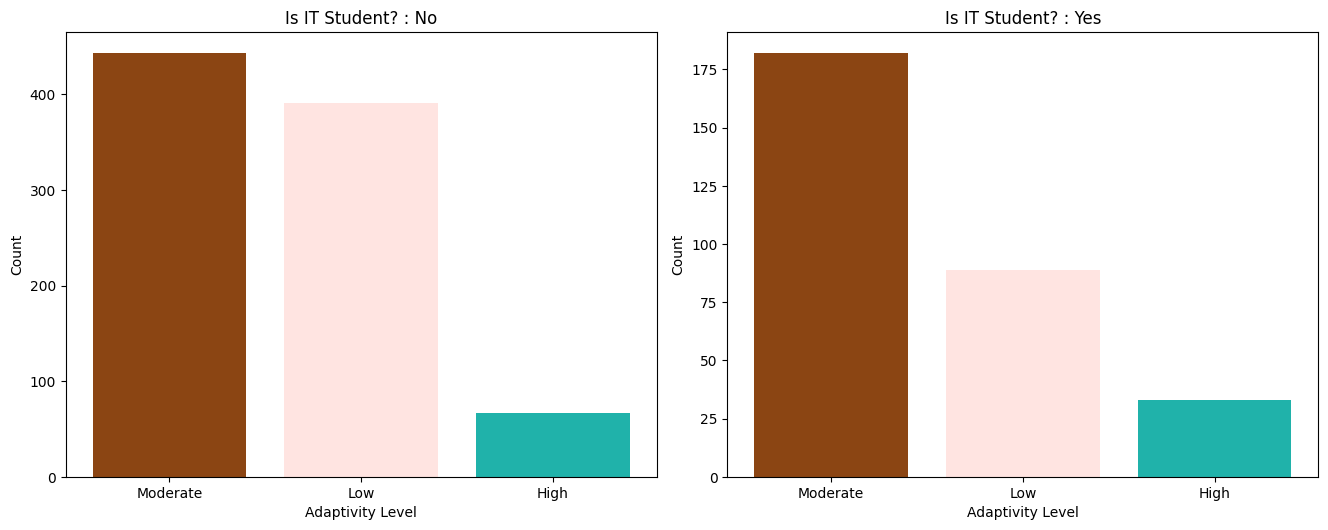

In [93]:
# Are IT Students more suited to Online Education
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["IT Student"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["IT Student"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Is IT Student? : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

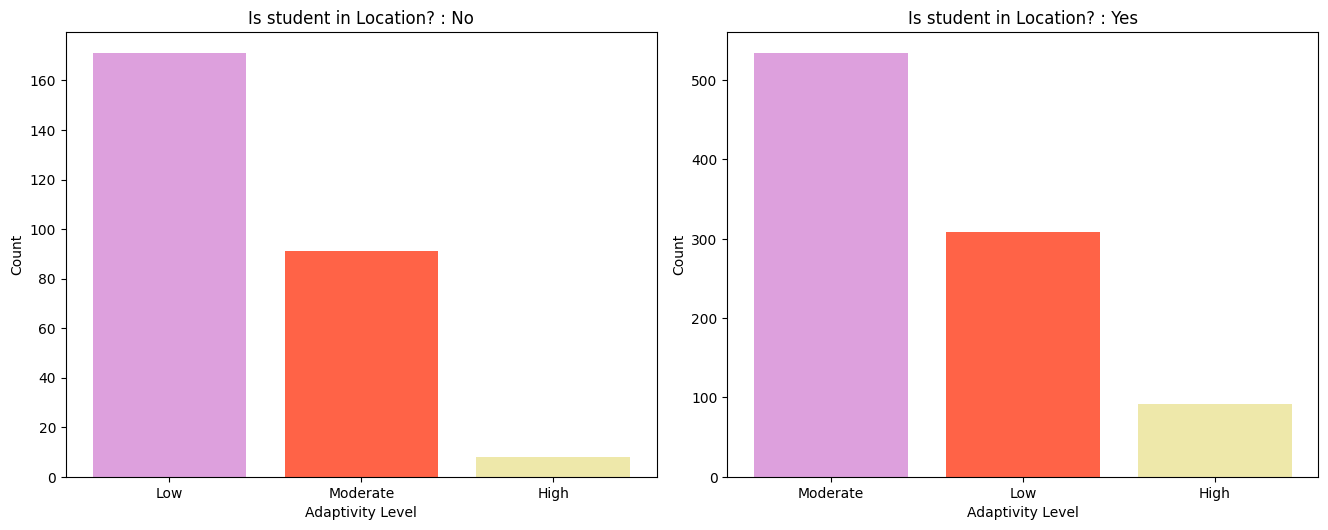

In [94]:
# How location impacts Online Education?
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Location"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Location"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Is student in Location? : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

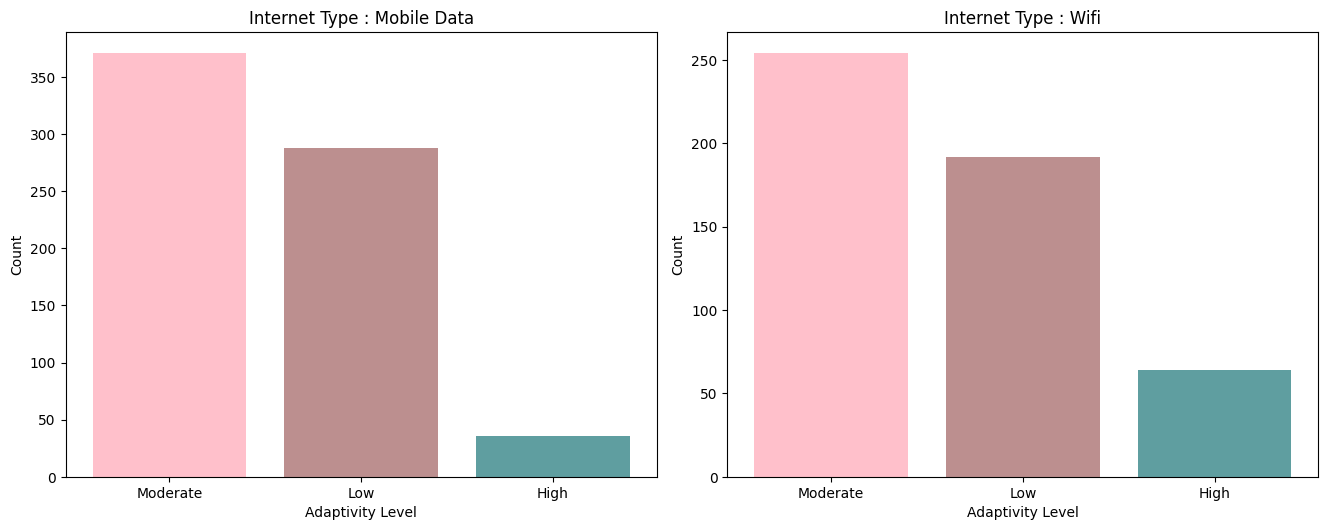

In [95]:
# How Internet impacts Online Education?
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Internet Type"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Internet Type"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Internet Type : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

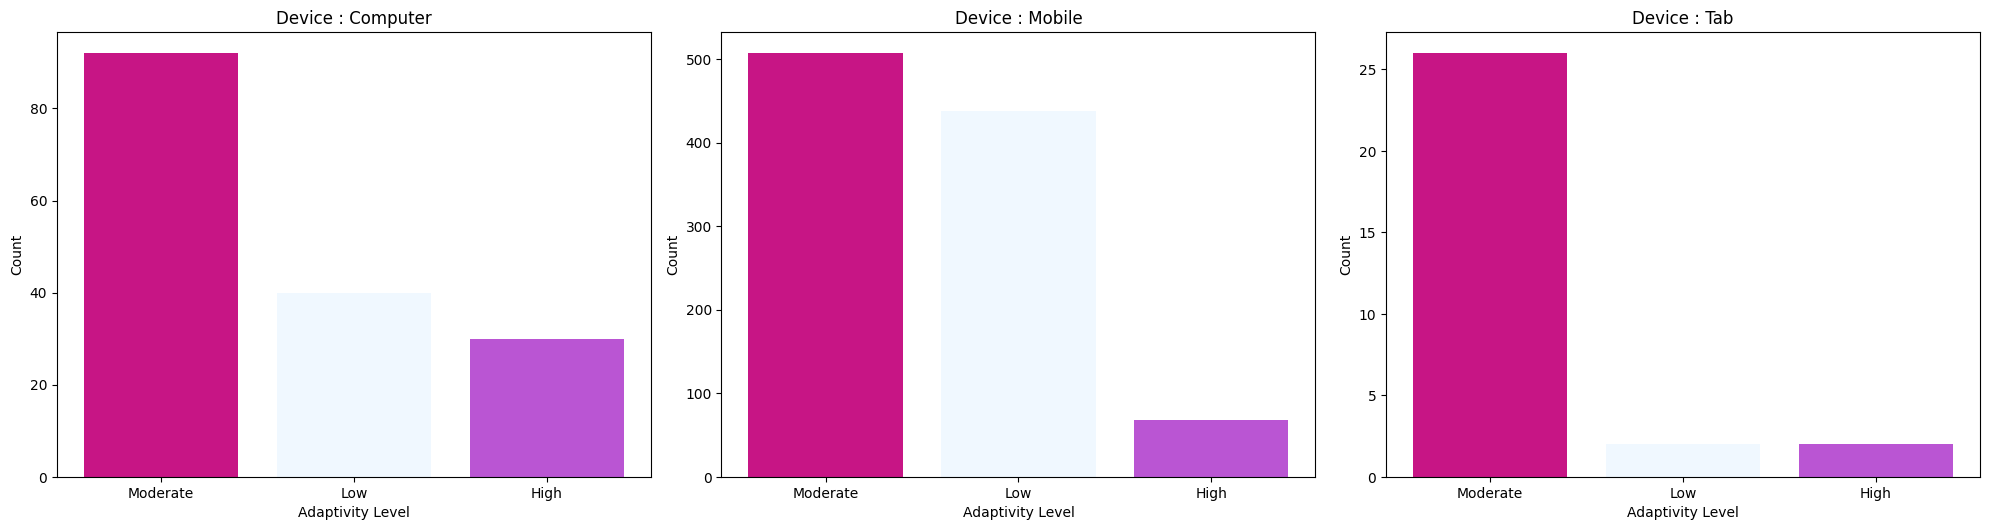

In [96]:
# How device type impacts Online Education?
random.shuffle(colors)
plt.figure(figsize=(20,10))
graphs = 1
for i in np.unique(data["Device"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(data[data["Device"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count, color = colors)
    plt.title("Device : " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

In [97]:
enc = LabelEncoder()
data.Gender = enc.fit_transform(data.Gender)
data["Education Level"] = enc.fit_transform(data["Education Level"])
data["Institution Type"] = enc.fit_transform(data["Institution Type"])
data["IT Student"] = enc.fit_transform(data["IT Student"])
data["Location"] = enc.fit_transform(data["Location"])
data["Load-shedding"] = enc.fit_transform(data["Load-shedding"])
data["Financial Condition"] = enc.fit_transform(data["Financial Condition"])
data["Internet Type"] = enc.fit_transform(data["Internet Type"])
data["Network Type"] = enc.fit_transform(data["Network Type"])
data["Class Duration"] = enc.fit_transform(data["Class Duration"])
data["Self Lms"] = enc.fit_transform(data["Self Lms"])
data["Device"] = enc.fit_transform(data["Device"])
data["Adaptivity Level"] = enc.fit_transform(data["Adaptivity Level"])
data["Age"] = enc.fit_transform(data["Age"])

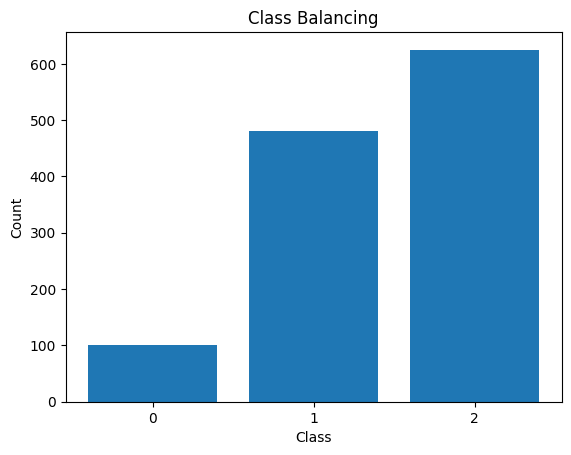

In [98]:
un, counts = np.unique(data["Adaptivity Level"],return_counts=True)
plt.bar([str(i) for i in un], counts)
plt.title("Class Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [99]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(data.drop(["Adaptivity Level"],axis=1),data["Adaptivity Level"])

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(features,labels,test_size = 0.2,shuffle=True)

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [102]:
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(model1.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(model1.predict(X_test),Y_test)*100))
print("Precision      : {:.2f} %".format(precision_score(model1.predict(X_test),Y_test,average='micro')*100))
print("Recall         : {:.2f} %".format(recall_score(model1.predict(X_test),Y_test,average='micro')*100))

Train Accuracy : 93.87 %
Test Accuracy  : 89.87 %
Precision      : 89.87 %
Recall         : 89.87 %


In [103]:
from sklearn.tree import export_graphviz
featured_col = list((data.columns))
featured_col.remove('Adaptivity Level')
export_graphviz(model1, 'tree.dot', feature_names = featured_col)

In [104]:
! dot -Tpng tree.dot -o tree.png

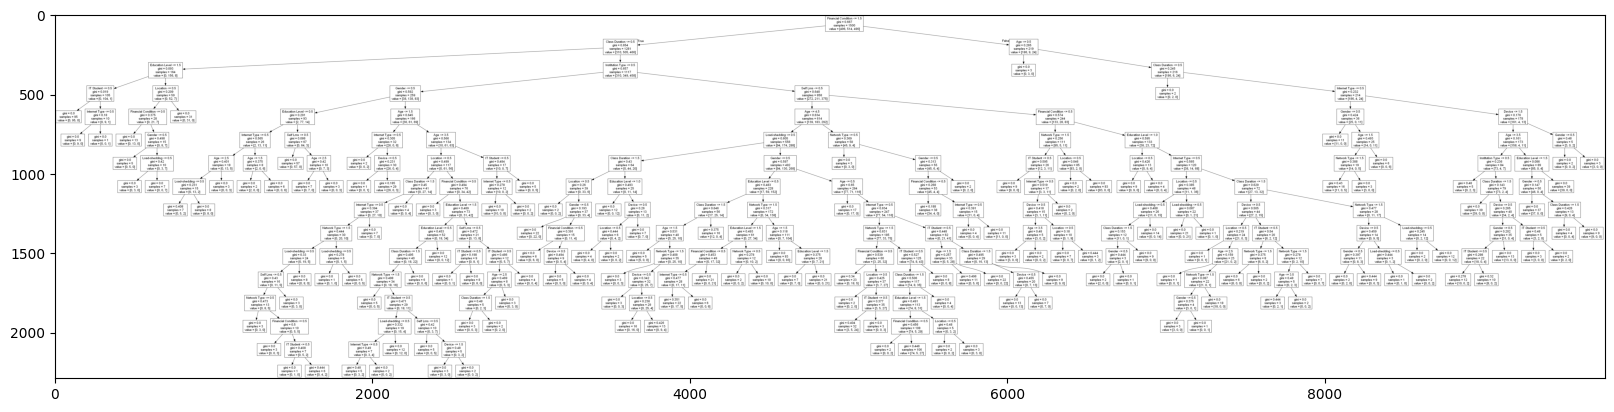

In [105]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)
plt.show()

In [106]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_test),Y_test)*100))
print("Precision      : {:.2f} %".format(precision_score(model.predict(X_test),Y_test,average='micro')*100))
print("Recall         : {:.2f} %".format(recall_score(model.predict(X_test),Y_test,average='micro')*100))

Train Accuracy : 93.87 %
Test Accuracy  : 90.13 %
Precision      : 90.13 %
Recall         : 90.13 %


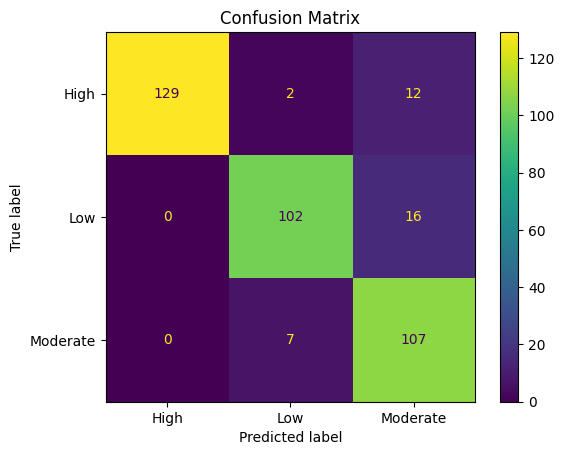

In [107]:
cm = confusion_matrix(model.predict(X_test),Y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [108]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder,StandardScaler

In [109]:
label_encoders = {}
categorical_columns = data.columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [110]:
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,3,2,1,0,1,1,1,1,2,2,0,2,2
1,0,3,2,1,0,1,0,1,0,2,1,1,1,2
2,0,2,0,0,0,1,1,1,1,2,1,0,1,2
3,0,1,1,1,0,1,1,1,0,2,1,0,1,2
4,0,2,1,1,0,1,1,0,0,1,0,0,1,1


In [111]:
X = data.drop(columns="Adaptivity Level")           
y = data["Adaptivity Level"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (903, 13)
X Test  :  (302, 13)
Y Train :  (903,)
Y Test  :  (302,)


In [112]:
li = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),MLPClassifier(),XGBClassifier(),SVC()]
d = {}
for model in li:
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    name =  model if 'XGBClassifier' not in str(model) else 'XGBClassifier: '
    print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),y_train)*100))
    print("Test Accuracy  : {:.2f} %".format(accuracy_score(ypred,y_test)*100))
    print("Precision      : {:.2f} %".format(precision_score(ypred,y_test,average='micro')*100))
    print("Recall         : {:.2f} %".format(recall_score(ypred,y_test,average='micro')*100))
    print(name,":",accuracy_score(y_test,ypred)*100)
    d.update({str(model):model.score(X_test,y_test)*100})
    print('-'*20)

Train Accuracy : 66.89 %
Test Accuracy  : 67.88 %
Precision      : 67.88 %
Recall         : 67.88 %
LogisticRegression() : 67.88079470198676
--------------------
Train Accuracy : 93.36 %
Test Accuracy  : 89.74 %
Precision      : 89.74 %
Recall         : 89.74 %
DecisionTreeClassifier() : 89.73509933774835
--------------------
Train Accuracy : 93.24 %
Test Accuracy  : 91.06 %
Precision      : 91.06 %
Recall         : 91.06 %
RandomForestClassifier() : 91.05960264900662
--------------------
Train Accuracy : 87.93 %
Test Accuracy  : 79.14 %
Precision      : 79.14 %
Recall         : 79.14 %
KNeighborsClassifier() : 79.13907284768213
--------------------


c:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy : 81.40 %
Test Accuracy  : 79.47 %
Precision      : 79.47 %
Recall         : 79.47 %
MLPClassifier() : 79.47019867549669
--------------------
Train Accuracy : 93.36 %
Test Accuracy  : 91.39 %
Precision      : 91.39 %
Recall         : 91.39 %
XGBClassifier:  : 91.3907284768212
--------------------
Train Accuracy : 77.96 %
Test Accuracy  : 78.81 %
Precision      : 78.81 %
Recall         : 78.81 %
SVC() : 78.80794701986756
--------------------


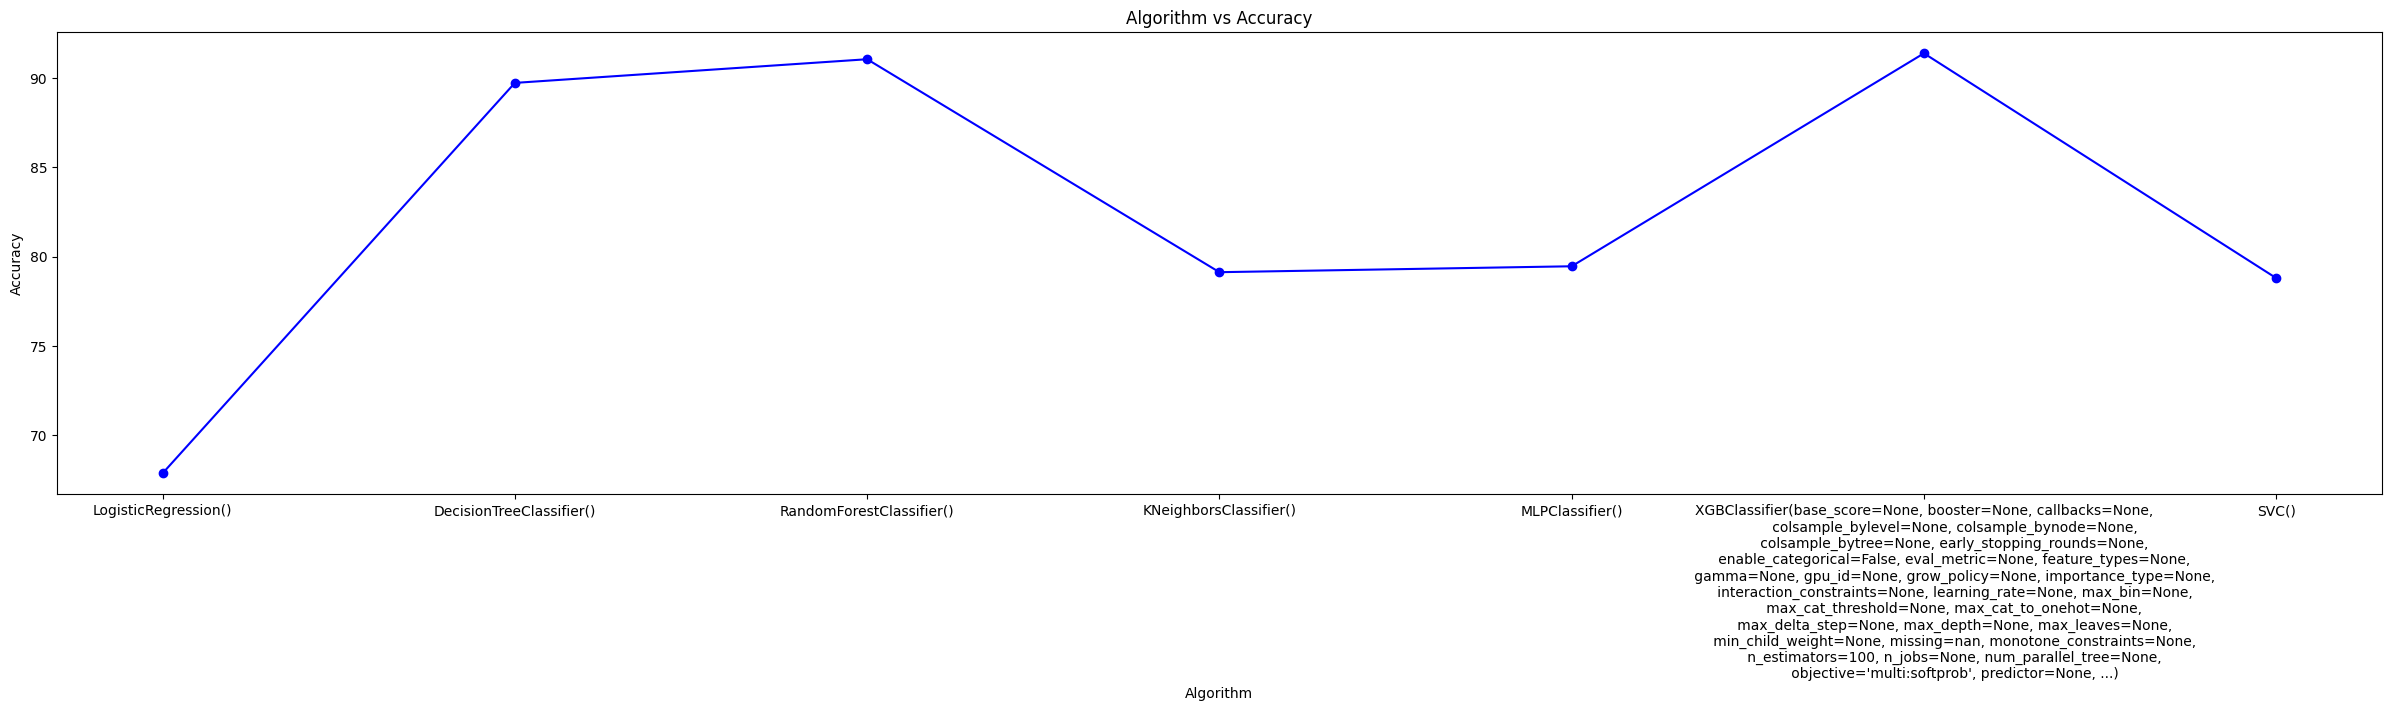

In [113]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='blue')
plt.show()